In [4]:
# Data handling
import pandas as pd
import numpy as np

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import os
os.getcwd()

'F:\\ZeAI\\Zyla\\StudentsPerformance'

In [5]:
# Load the dataset
data = pd.read_csv("F:/ZeAI/Zyla/StudentsPerformance/StudentsPerformance.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
# Calculate average score
data['average_score'] = (data['math score'] + data['reading score'] + data['writing score']) / 3

# Create Pass/Fail column
data['pass_fail'] = data['average_score'].apply(lambda x: 1 if x >= 50 else 0)

# Check the updated dataset
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,pass_fail
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,1
1,female,group C,some college,standard,completed,69,90,88,82.333333,1
2,female,group B,master's degree,standard,none,90,95,93,92.666667,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,0
4,male,group C,some college,standard,none,76,78,75,76.333333,1


In [7]:
le = LabelEncoder()

categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Check the dataset after encoding
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,pass_fail
0,0,1,1,1,1,72,72,74,72.666667,1
1,0,2,4,1,0,69,90,88,82.333333,1
2,0,1,3,1,1,90,95,93,92.666667,1
3,1,0,0,0,1,47,57,44,49.333333,0
4,1,2,4,1,1,76,78,75,76.333333,1


In [8]:
# Features (X) – all columns except 'average_score' and 'pass_fail'
X = data[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 
          'test preparation course', 'math score', 'reading score', 'writing score']]

# Target (y) – the column to predict
y = data['pass_fail']

In [9]:
# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (800, 8)
X_test: (200, 8)
y_train: (800,)
y_test: (200,)


In [10]:
# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
y_pred = model.predict(X_test)

In [12]:
# Print first 10 predictions
print(y_pred[:10])

[1 1 1 1 1 1 1 1 1 0]


In [13]:
# Compare actual vs predicted
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head(10))

     Actual  Predicted
521       1          1
737       1          1
740       1          1
660       1          1
411       1          1
678       1          1
626       1          1
513       1          1
859       1          1
136       0          0


Accuracy: 0.995


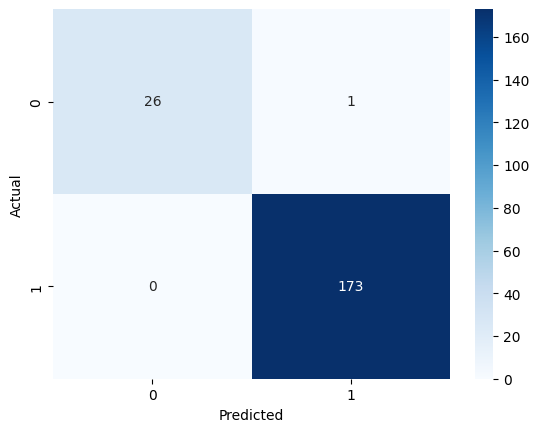

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        27
           1       0.99      1.00      1.00       173

    accuracy                           0.99       200
   macro avg       1.00      0.98      0.99       200
weighted avg       1.00      0.99      0.99       200



In [14]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

                       Feature  Importance
7                writing score    0.357313
5                   math score    0.280872
6                reading score    0.279265
1               race/ethnicity    0.025477
2  parental level of education    0.020555
0                       gender    0.016029
3                        lunch    0.012534
4      test preparation course    0.007954


C:\Users\Dell\AppData\Local\Temp\ipykernel_13416\984321575.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


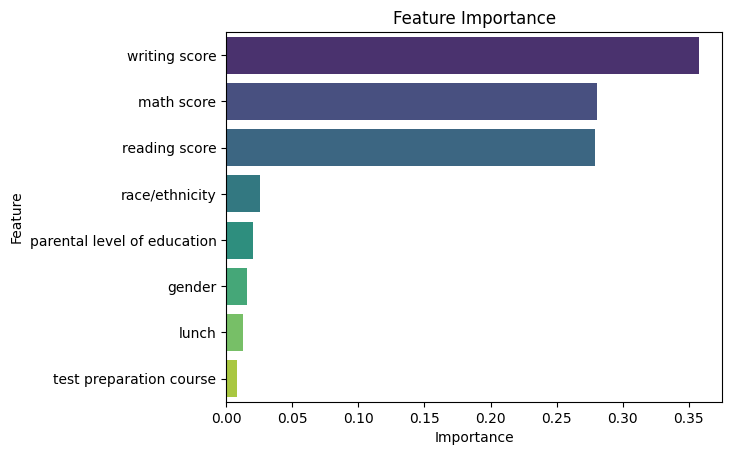

In [15]:
# Get feature importance
importance = model.feature_importances_

# Combine feature names and importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Display feature importance
print(feature_importance)

# Optional: Plot feature importance
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title("Feature Importance")
plt.show()

In [16]:
# Create suggestions based on feature importance
print("\nAI-Based Insights & Suggestions:\n")

for index, row in feature_importance.iterrows():
    feature = row['Feature']
    importance = row['Importance']
    
    if importance > 0.2:
        print(f"- {feature.title()} is highly important ({importance:.2f}). Students should focus on improving this to increase their chances of passing.")
    elif importance > 0.05:
        print(f"- {feature.title()} has moderate impact ({importance:.2f}). Improving this can help but is less critical.")
    else:
        print(f"- {feature.title()} has minor impact ({importance:.2f}). Consider this for additional support if needed.")


AI-Based Insights & Suggestions:

- Writing Score is highly important (0.36). Students should focus on improving this to increase their chances of passing.
- Math Score is highly important (0.28). Students should focus on improving this to increase their chances of passing.
- Reading Score is highly important (0.28). Students should focus on improving this to increase their chances of passing.
- Race/Ethnicity has minor impact (0.03). Consider this for additional support if needed.
- Parental Level Of Education has minor impact (0.02). Consider this for additional support if needed.
- Gender has minor impact (0.02). Consider this for additional support if needed.
- Lunch has minor impact (0.01). Consider this for additional support if needed.
- Test Preparation Course has minor impact (0.01). Consider this for additional support if needed.
